In [708]:
import numpy as np
import matplotlib.pyplot as plt
import math

class MonteCarlo1DSlab:
    def __init__(self , L, sigma_abso, sigma_scat, N_hist, num_bins, inc_mu_val):
        self.L = L
        self.sigma_abso = sigma_abso
        self.sigma_scat = sigma_scat
        self.N_hist = N_hist
        self.num_bins = num_bins
        self.inc_mu_val = inc_mu_val


    def absorption_case(self):
        #Absorber case, Multiple particles
        
        #Parameters
        x_beg = 0
        x_end = 0
        L = self.L
        sig_a = self.sigma_abso
        sigma_t = sig_a # Total macroscopic cross-section (cm^-1), should be the same as sigma_a or sigma_s
        mu = self.inc_mu_val
        N_bins = self.num_bins        
            
        #Determine the length of each bin and set up counters for each bin to tally the particles. Also set up leakage counters
        bin_length = L / N_bins
        bins_tally = np.linspace(0,0,200)
        left_leakage_tally = 0
        right_leakage_tally = 0
        
        #Set up number of particles and their associated random number to determine distances
        num_samples = self.N_hist  # Number of distances to sample
        ran_samples = np.random.rand(num_samples)
        
        for i in range (num_samples):
            x_beg = 0
            x_end = 0
            
            #Sapling distances
            d = -1 / sigma_t * np.log(ran_samples[i])
        
            #For an isotropic source, the cosine of the angle of incidence must be determined
            if mu == "Isotropic":
                squig = np.random.rand(1)
                mu = np.sqrt(squig[0])
            
        
            #Add distance before any interaction occurs to inital position, accounting for angle
            x_end = x_beg + (mu * d)
        
            #Check if particle left the slab
            if x_end >= L:
                x_end = L
            elif x_end < 0:
                x_end = 0
        
            #Determine the bin that the particle has its first interaction in, and total track length in final bin.
            bin_num = x_end / bin_length
            bin_before = math.floor(bin_num)
            bin_current_length = (bin_num - bin_before) * bin_length
        
            #Add tallies to respective bins based on path length traveled in each bin
            for i in range(bin_before):
                bins_tally[i] = bins_tally[i] + bin_length
            
            #Add partial tally to bin where particle has its first interaction
            if x_end != L: 
                bins_tally[bin_before] = bins_tally[bin_before] + bin_current_length
            
            #Count Leakages
            if x_end ==0:
                left_leakage_tally = left_leakage_tally + 1
            if x_end ==L:
                right_leakage_tally = right_leakage_tally +1
            
            #Check absorbtion at the end of particle path length (should be 100% absorbtion rate, as it is the only interaction type)
            if x_end > 0 and x_end < L:
                rand = np.random.rand(1)
                if rand <= (sig_a/sigma_t):
                    continue
        
        #Analytical Comparison for Comparison Case
        #A correction factor of 20 was multiplied with the mu to correctly fit the curve
        def eqn(x, c, sigma_t, mu):
            return c * np.exp (-1 * (sigma_t * x) / (mu*20))

        #Case where if the incident angle is isotropic, the mu for the analytical solution is the average value
        if mu == "Isotropic":
            count = 0
            for i in range (num_samples):
                squig = np.random.rand(1)
                mu_fill = np.sqrt(squig[0])
                count = count + mu_fill
            mu = count/num_samples

        
        #Graph of analytical solution on top of scalar flux plot
        x_data = np.linspace(1,200, 200)
        y_data = eqn(x_data, bins_tally[0], sigma_t , mu)
        plt.plot(x_data, y_data, label="Analytical Value", color = 'red', linewidth = 2)
        plt.bar(x_data, bins_tally, label="Simulated Value", width=1.0)
        plt.xlabel("Bins")
        plt.ylabel("Scalar Flux")
        plt.legend()
        plt.show()
        print("The histories of", num_samples,"particles were created.")
        print("Of those particles", right_leakage_tally, "lekaed to the right.")
        print("Of those particles", left_leakage_tally, "leaked to the left.")
        return
        

    def scatter_case(self):
        #Scatter Case
        #Parameter
        L = self.L
        sigma_s = self.sigma_scat
        sigma_t = sigma_s # Total macroscopic cross-section (cm^-1), should be the same as sigma_a or sigma_s
        mu = self.inc_mu_val
        N_bins = self.num_bins
        
        #Determine the length of each bin and set up counters for each bin to tally the particles. Also set up leakage counters
        bin_length = L/ N_bins
        bins_tally = np.linspace(0,0,200)
        bins_left_x_value = np.linspace(0,9.95,200)
        left_leakage_tally = 0
        right_leakage_tally = 0
        
        #Set up number of particles and their associated random number to determine distances
        num_samples = 1000  # Number of distances to sample
        ran_samples = np.random.rand(num_samples)
        
        for i in range (num_samples):
    
            #Initial Distance
            x_beg = 0
            x_end = 0
            d = -1 / sigma_t * np.log(ran_samples[i])
            x_end = x_beg + (mu * d)
        
            #Check if particle left the slab
            if x_end >= L:
                x_end = L
            elif x_end < 0:
                x_end = 0
        
            #Count Leakages in the case that the particle left the slab
            if x_end ==0:
                left_leakage_tally = left_leakage_tally + 1
            if x_end ==L:
                right_leakage_tally = right_leakage_tally +1
                bin_num = x_end / bin_length
                bin_before = math.floor(bin_num)
                bin_current_length = (bin_num - bin_before) * bin_length
                #Add tallies to respective bins based on path length traveled in each bin
                for i in range(bin_before):
                    bins_tally[i] = bins_tally[i] + bin_length
        
            while True: #Loops program until particle scatters out to the left or right, ending its history (done with break statements)
        
                x_diff = x_end - x_beg
        
                #Case where particle is scattered forward in the x direction
                if x_diff >= 0:
                    #Determine the bin that the particle has its next interaction in, and total track length in bin interaction occurs.
                    #Initial Case when particle begins at x=0
                    current_bin = 0
                    if x_beg ==0:
                        bin_num = x_end / bin_length
                        bin_before = math.floor(bin_num)
                        bin_current_length = (bin_num - bin_before) * bin_length
                
                        #Add tallies to respective bins based on path length traveled in each bin
                        for i in range(bin_before):
                            bins_tally[i] = bins_tally[i] + bin_length
                
                        #Add partial tally to bin where particle has its first interaction
                        if x_end != L and x_end !=0: 
                            bins_tally[bin_before] = bins_tally[bin_before] + bin_current_length
        
                    #After scattering
                    elif x_beg !=0 :
                        #Find the bin where the particle is before scattering
                        beg_bin = 0
                        while True:
                            if beg_bin == 199:
                                break
                            if x_beg <= bins_left_x_value[beg_bin+1]:
                                break
                            elif True:
                                beg_bin = beg_bin +1
                                
                    #Counts the bin the particle scatters to
                        current_bin = 0
                        while True:
                            if current_bin == 199:
                                break
                            if x_end <= bins_left_x_value[current_bin+1]:
                                break
                            elif True:
                                current_bin = current_bin +1
        
                    #Check to see if particle after scattering left the current bin. If it has not, tally distance in current bin
                    if x_beg != 0 and beg_bin == current_bin:
                        bins_tally[current_bin] = bins_tally[current_bin] + x_diff
                        #Account for if the particle scatters off of the first bin into the right
                        if x_end == L:
                            x_diff = x_diff - x_end
                            x_end = 0
                            right_leakage_tally = right_leakage_tally +1
                            break
                        
        
                    #Add correct tallies to current bins and bins after if particle has scattered into a different bin to the right
                    elif x_beg!=0 and current_bin > beg_bin :
                        #Adds partial tally to the bin the scattering occured
                        bins_tally[beg_bin] = bins_tally[beg_bin] + (bins_left_x_value [beg_bin+1] - x_beg)
                        #Check if scattered particle has left the slab, and update leakage accordingly
                        if x_end >= L:
                            x_diff = L-x_beg
                            x_end = L
                            right_leakage_tally = right_leakage_tally +1
                            
                            x_diff = x_diff - (bins_left_x_value[beg_bin+1] - x_beg)
                            bin_num = x_diff / bin_length
                            bin_skip = math.floor(bin_num)
                            bin_current_length = (bin_num - bin_skip) * bin_length
                    
                            #Add tallies to respective bins based on path length traveled in each bin
                            for i in range(beg_bin+1, current_bin+1, 1):
                                bins_tally[i] = bins_tally[i] + bin_length
                            break
        
                        #Tally the rest of the distance traveled by the particle in the next bins in the case it did not leave the slab
                        x_diff = x_diff - (bins_left_x_value[beg_bin+1] - x_beg)
                        bin_num = x_diff / bin_length
                        bin_skip = math.floor(bin_num)
                        bin_current_length = (bin_num - bin_skip) * bin_length
                
                        #Add tallies to respective bins based on path length traveled in each bin
                        for i in range(beg_bin+1, current_bin, 1):
                            bins_tally[i] = bins_tally[i] + bin_length
        
                        #Add partial tally to bin where particle has its next scattering interaction
                        if x_end != L and x_end !=0: 
                            bins_tally[current_bin] = bins_tally[current_bin] + bin_current_length
        
                #Case where particle scatters in the left direction
                if x_diff <0:
                    #Counts the bin the particle has its interaction
                    beg_bin = 199
                    while True:
                        if beg_bin == 0 or x_beg >= bins_left_x_value[beg_bin]:
                            break
                        elif True:
                            beg_bin = beg_bin -1
        
                    #Counts the bin the particle scatters to
                    current_bin = 199
                    while True:
                        if current_bin == 0 or x_end >= bins_left_x_value[current_bin]:
                            break
                        elif True:
                            current_bin = current_bin -1
        
                    #Check to see if particle after scattering left the current bin. If it has not, tally distance in current bin
                    if current_bin == beg_bin:
                        bins_tally[current_bin] = bins_tally[current_bin] + (-1 * x_diff)
                        #Account for if the particle scatters off of the first bin into the left
                        if x_end == 0:
                            x_diff = x_diff - x_end
                            x_end = 0
                            left_leakage_tally = left_leakage_tally +1
                            break
                        
        
                    #Add correct tallies to current bins and bins after if particle has scattered into a different bin to the left
                    elif current_bin < beg_bin:
                        #Adds partial tally to the bin the scattering occured
                        bins_tally[beg_bin] = bins_tally[beg_bin] + (x_beg - bins_left_x_value [beg_bin])
        
                        #Check if scattered particle has left the slab, and update leakage accordingly
                        if x_end == 0:
                            x_diff = x_diff - x_end
                            x_end = 0
                            left_leakage_tally = left_leakage_tally +1
        
                            #Tally the rest of the distance traveled by the particle in the next bins
                            x_diff = (x_diff * -1) - (x_beg - bins_left_x_value[beg_bin])
                            bin_num = x_diff / bin_length
                            bin_skip = math.floor(bin_num)
                            bin_current_length = (bin_num - bin_skip) * bin_length
            
                            #Add tallies to respective bins based on path length traveled in each bin
                            for i in range(beg_bin-1, current_bin-1, -1):
                                bins_tally[i] = bins_tally[i] + bin_length
                            break
        
                        #Tally the rest of the distance traveled by the particle in the next bins
                        x_diff = (x_diff * -1) - (x_beg - bins_left_x_value[beg_bin])
                        bin_num = x_diff / bin_length
                        bin_skip = math.floor(bin_num)
                        bin_current_length = (bin_num - bin_skip) * bin_length
        
                        #Add tallies to respective bins based on path length traveled in each bin
                        for i in range(beg_bin-1, current_bin, -1):
                            bins_tally[i] = bins_tally[i] + bin_length
                
                        #Add partial tally to bin where particle will have its next scattering interaction
                        if x_end != L and x_end !=0: 
                            bins_tally[current_bin] = bins_tally[current_bin] + bin_current_length
        
        
                #Check scattering at the end of particle path length (should be 100% scattering rate, as it is the only interaction type)
                if x_end > 0 and x_end < L:
                    rand = np.random.rand(1)
                    if rand <= (sigma_s/sigma_t): #If this condition is fulfilled, scattering occurs, and the loop restarts
                        mu_fill = (2 * np.random.rand(1)) -1
                        d_fill = -1 / sigma_t * np.log(np.random.rand(1))
                        x_beg = x_end
                        x_end = x_beg + (mu_fill * d_fill)[0]
        
                        #Check if particle left the slab
                        if x_end >= L:
                            x_end = L
                        if x_end < 0:
                            x_end = 0
        #Create figure showing scalar flux distributions across the bins
        x_data = np.linspace(1,200, 200)
        plt.bar(x_data, bins_tally, label="Simulated Value", width=1.0)
        plt.xlabel("Bins")
        plt.ylabel("Scalar Flux")
        plt.legend()
        plt.show()
        print("The histories of", num_samples,"particles were created.")
        print("Of those particles", right_leakage_tally, "lekaed to the right.")
        print("Of those particles", left_leakage_tally, "leaked to the left.")
        return
            
    

In [710]:
def readfile(file):
    with open(file, "r") as file:
        next(file)
        values = []
        data = file.read()
        data = data.splitlines()
        L = 0
        sigma_a = 0
        sigma_s = 0
        N_hist = 0
        inc_u_val = 0
        for i in range(6):
            x = data[i].split('=')[1]
            values.append(data[i].split('=')[1])

        for i in range(6):
            if values[i] == "Isotropic":
                values[i] = values[i]
                continue
            if float(values[i])>=1:
                values[i] = int(values[i])
            if float(values[i])<1:
                values[i] = float(values[i])
    return values[0], values[1], values[2], values[3], values[4], values[5]

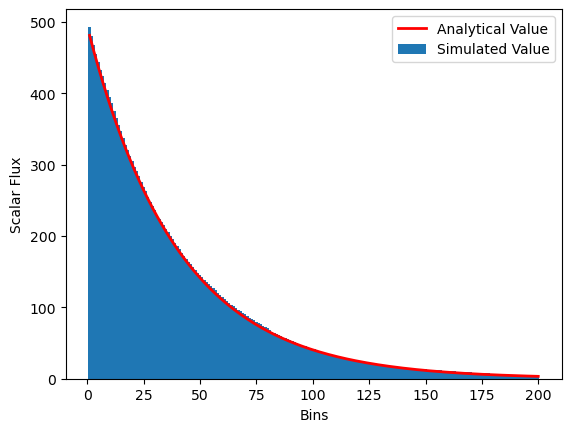

The histories of 10000 particles were created.
Of those particles 87 lekaed to the right.
Of those particles 0 leaked to the left.


In [712]:
#Read Values into variables to be used into class
a1,b1,c1,d1,e1,f1 = readfile("Pure Absorber Case #1.txt")

test1 = MonteCarlo1DSlab(a1,b1,c1,d1,e1,f1)
test1.absorption_case()

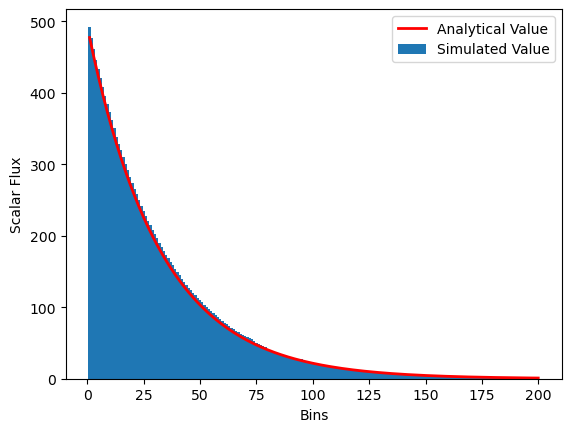

The histories of 10000 particles were created.
Of those particles 16 lekaed to the right.
Of those particles 0 leaked to the left.


In [714]:
#Read Values into variables to be used into class
a2,b2,c2,d2,e2,f2 = readfile("Pure Absorber Case #2.txt")

test2 = MonteCarlo1DSlab(a2,b2,c2,d2,e2,f2)
test2.absorption_case()

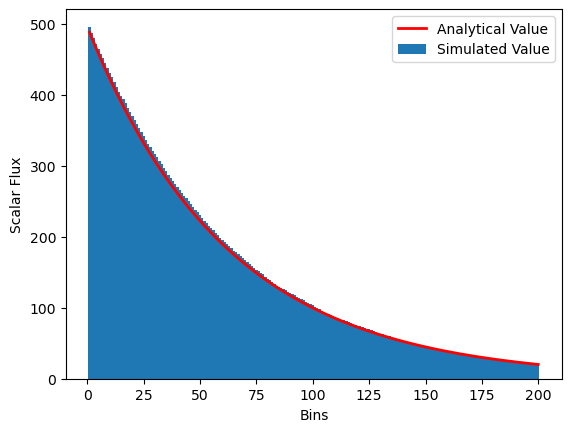

The histories of 10000 particles were created.
Of those particles 376 lekaed to the right.
Of those particles 0 leaked to the left.


In [716]:
#Read Values into variables to be used into class
a3,b3,c3,d3,e3,f3 = readfile("Pure Absorber Case #3.txt")
test3 = MonteCarlo1DSlab(a3,b3,c3,d3,e3,f3)
test3.absorption_case()

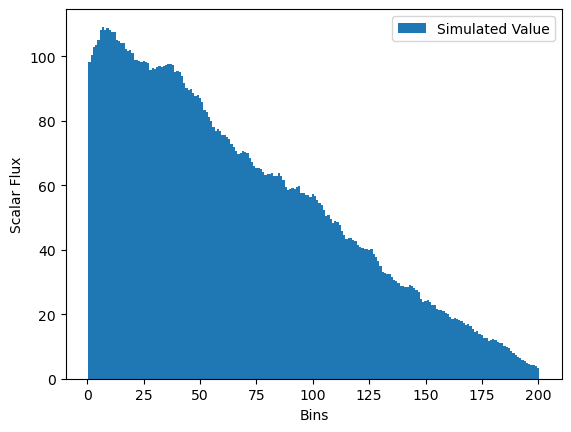

The histories of 1000 particles were created.
Of those particles 63 lekaed to the right.
Of those particles 937 leaked to the left.


In [718]:
#Read Values into variables to be used into class
a4,b4,c4,d4,e4,f4 = readfile("Pure Scatter Case #1.txt")
test4 = MonteCarlo1DSlab(a4,b4,c4,d4,e4,f4)
test4.scatter_case()

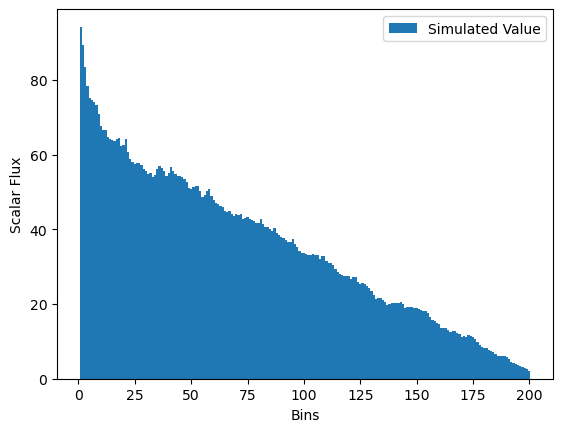

The histories of 1000 particles were created.
Of those particles 38 lekaed to the right.
Of those particles 962 leaked to the left.


In [720]:
#Read Values into variables to be used into class
a5,b5,c5,d5,e5,f5 = readfile("Pure Scatter Case #2.txt")
test5 = MonteCarlo1DSlab(a5,b5,c5,d5,e5,f5)
test5.scatter_case()